In [67]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns
from IPython.display import Markdown
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px



In [68]:
#This is Clean Data for plotting graphs for each TSA Hospitlization vs Fatalitiy
fatal = pd.read_excel("https://github.com/Data-Analytics-COVID-Hypothesis/Hypothesis-1/blob/master/Fatality.xlsx?raw=true",skiprows=2)
fatal = fatal.truncate(before=0, after=253)

fatal["County Name"]= fatal["County Name"].str.title() 
fatal = fatal.set_index('County Name')

fatal.keys()

hosp = pd.read_excel("https://github.com/Data-Analytics-COVID-Hypothesis/Hypothesis-1/blob/master/Hospital.xlsx?raw=true", sheet_name= 'COVID-19 Hospitalizations', skiprows=2)
hosp = hosp.truncate(before=0, after=21)

In [69]:
#Extracting TSA A County Data for merging all number of fatalities in for complete TSA 
TSA1 = fatal.loc[["Anderson", "Briscoe", "Carson" , "Childress" , "Collingsworth" ,"Dallam","Deaf Smith","Donley","Gray","Hall","Hansford","Hartley","Hemphill","Hutchinson","Lipscomb","Moore","Ochiltree","Oldham","Parmer","Potter","Randall","Roberts","Sherman","Swisher","Wheeler" ]]
TSA2 = fatal.loc[['Bailey','Borden','Castro','Cochran','Cottle','Crosby','Dawson','Dickens','Floyd','Gaines','Garza','Hale','Hockley','Kent','King','Lamb','Lubbock','Lynn','Motley','Scurry','Terry','Yoakum']]
TSA3 = fatal.loc[['Archer', 'Baylor','Clay','Foard','Hardeman','Jack','Montague','Wichita','Wilbarger','Young']]
TSA4 = fatal.loc[['Brown', 'Callahan', 'Coleman', 'Comanche','Eastland', 'Fisher', 'Haskell', 'Jones', 'Knox', 'Mitchell', 'Nolan', 'Shackelford', 'Stephens', 'Stonewall', 'Taylor','Throckmorton']]
TSA5 = fatal.loc[['Collin','Cooke','Dallas','Denton','Ellis','Erath','Fannin','Grayson','Hood','Hunt','Johnson','Kaufman','Navarro','Palo Pinto','Parker','Rockwall','Somervell','Tarrant','Wise']]
TSA6 = fatal.loc[['Bowie','Cass','Delta','Hopkins','Lamar','Morris','Red River','Titus']]
TSA7 = fatal.loc[['Anderson', 'Camp','Cherokee','Franklin','Freestone','Gregg','Harrison','Henderson','Houston','Marion','Panola','Rains','Rusk', 'Shelby', 'Smith','Trinity','Upshur','Van Zandt','Wood']]
TSA8 = fatal.loc[['Angelina','Nacogdoches','Polk','Sabine','San Augustine', 'San Jacinto', 'Tyler']]
TSA9 = fatal.loc[['Culberson','El Paso', 'Hudspeth']]
TSA10 = fatal.loc[['Andrews','Brewster','Crane','Ector','Glasscock','Howard','Jeff Davis','Loving','Martin','Midland','Pecos','Presidio','Reeves','Terrell','Upton','Ward','Winkler']]
TSA11 = fatal.loc[['Coke','Concho','Crockett','Irion','Kimble','Mason','Mcculloch','Menard','Reagan','Runnels','Schleicher','Sterling','Sutton','Tom Green']]
TSA12= fatal.loc[['Bell','Coryell','Hamilton','Lampasas','Milam','Mills']]
TSA13= fatal.loc[['Bosque','Falls','Hill','Limestone','Mclennan']]
TSA14 = fatal.loc[['Brazos','Burleson','Grimes','Leon','Madison','Robertson','Washington']]
TSA15= fatal.loc[['Bastrop','Blanco','Burnet','Caldwell','Fayette','Hays','Lee','Llano','San Saba','Travis','Williamson']]
TSA16 = fatal.loc[['Atascosa','Bandera','Bexar','Comal','Dimmit','Edwards','Frio','Gillespie','Gonzales','Guadalupe','Karnes','Kendall','Kerr','Kinney','La Salle','Maverick','Medina','Real','Uvalde','Val Verde','Wilson','Zavala']]
TSA17 = fatal.loc[['Austin','Colorado','Fort Bend','Harris','Matagorda','Montgomery','Walker','Waller','Wharton']]
TSA18 = fatal.loc[['Brazoria','Chambers','Galveston','Hardin','Jasper','Jefferson','Liberty','Newton','Orange']]
TSA19 = fatal.loc[['Calhoun','De Witt','Goliad','Jackson','Lavaca','Victoria']]
TSA20 = fatal.loc[['Jim Hogg','Webb','Zapata']]
TSA21 = fatal.loc[['Aransas','Bee','Brooks','Duval','Jim Wells','Kenedy', 'Kleberg', 'Live Oak', 'Mcmullen','Nueces','Refugio','San Patricio']]
TSA22 = fatal.loc[['Cameron','Hidalgo','Starr','Willacy']]

In [70]:
pattern = re.compile('[0-9]+-[0-9]+-[0-9]+', re.IGNORECASE)
dates = [datetime.strptime(pattern.findall(sub)[0], '%Y-%m-%d') for sub in fatal.keys()]   

pattern = re.compile('[0-9]+-[0-9]+-[0-9]+')
fatal.columns=[pattern.findall(sub)[0] for sub in fatal.keys()]
fatal=fatal.T.copy()

pattern = re.compile('[0-9]+-[0-9]+-[0-9]+', re.IGNORECASE)
datesh = [datetime.strptime(pattern.findall(sub)[0], '%Y-%m-%d') for sub in hosp.keys()[2:]]   

hosp = hosp.drop(columns=['TSA ID'])
hosp = hosp.set_index('TSA AREA')

pattern = re.compile('[0-9]+-[0-9]+-[0-9]+')
hosp.columns=[pattern.findall(sub)[0] for sub in hosp.keys()]


In [71]:
#Getting Total Number of Fatalities for the TSA
TSA1.loc["Total"] = TSA1.sum()
TSA2.loc["Total"] = TSA2.sum()
TSA3.loc["Total"] = TSA3.sum()
TSA4.loc["Total"] = TSA4.sum()
TSA5.loc["Total"] = TSA5.sum()
TSA6.loc["Total"] = TSA6.sum()
TSA7.loc["Total"] = TSA7.sum()
TSA8.loc["Total"] = TSA8.sum()
TSA9.loc["Total"] = TSA9.sum()
TSA10.loc["Total"] = TSA10.sum()
TSA11.loc["Total"] = TSA11.sum()
TSA12.loc["Total"] = TSA12.sum()
TSA13.loc["Total"] = TSA13.sum()
TSA14.loc["Total"] = TSA14.sum()
TSA15.loc["Total"] = TSA15.sum()
TSA16.loc["Total"] = TSA16.sum()
TSA17.loc["Total"] = TSA17.sum()
TSA18.loc["Total"] = TSA18.sum()
TSA19.loc["Total"] = TSA19.sum()
TSA20.loc["Total"] = TSA20.sum()
TSA21.loc["Total"] = TSA21.sum()
TSA22.loc["Total"] = TSA22.sum()

&lt;matplotlib.legend.Legend at 0x21231635588&gt;

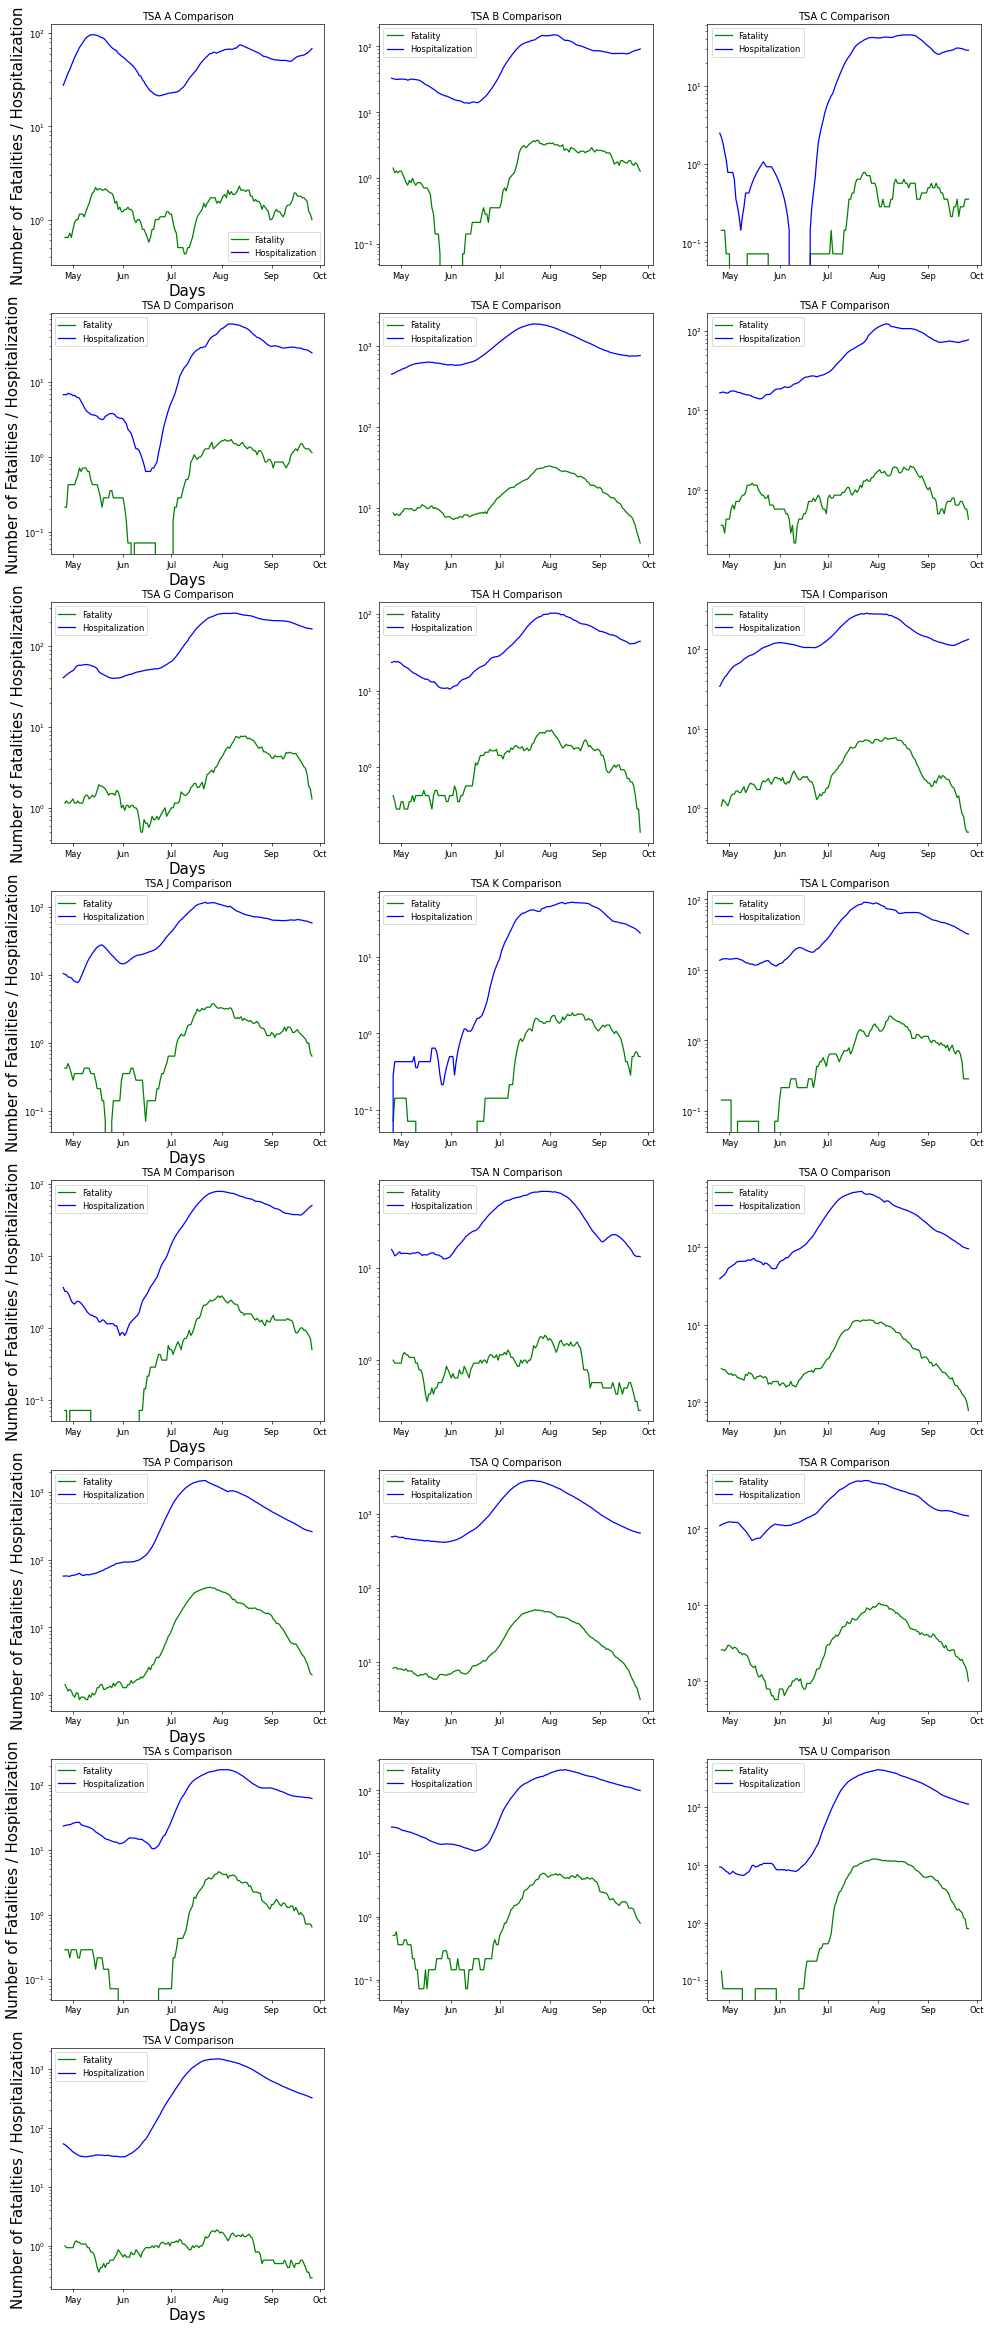

In [72]:
#Ploting for TSA 1
fig = plt.figure(figsize=(20,50), dpi=60)
ax1 = fig.add_subplot(8,3,1)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Number of Fatalities / Hospitalization', fontsize=18)
ax1.title.set_text('TSA A Comparison')
ax1.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA1.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Amarillo'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax1.legend()

ax2=plt.gca()
ax2 = fig.add_subplot(8,3,2)
ax2.title.set_text('TSA B Comparison')
ax2.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA2.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Lubbock'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax2.legend()

ax3=plt.gca()
ax3 = fig.add_subplot(8,3,3)
ax3.title.set_text('TSA C Comparison')
ax3.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA3.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Wichita Falls'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax3.legend()

ax4=plt.gca()
ax4 = fig.add_subplot(8,3,4)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Number of Fatalities / Hospitalization', fontsize=18)
ax4.title.set_text('TSA D Comparison')
ax4.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax4.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA4.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Abilene'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax4.legend()

ax5=plt.gca()
ax5 = fig.add_subplot(8,3,5)
ax5.title.set_text('TSA E Comparison')
ax5.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax5.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA5.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Dallas/Ft. Worth'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax5.legend()

ax6=plt.gca()
ax6 = fig.add_subplot(8,3,6)
ax6.title.set_text('TSA F Comparison')
ax6.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax6.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA6.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Paris'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax6.legend()

ax7=plt.gca()
ax7 = fig.add_subplot(8,3,7)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Number of Fatalities / Hospitalization', fontsize=18)
ax7.title.set_text('TSA G Comparison')
ax7.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax7.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA7.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Longview/Tyler'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax7.legend()

ax8=plt.gca()
ax8 = fig.add_subplot(8,3,8)
ax8.title.set_text('TSA H Comparison')
ax8.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax8.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA8.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Lufkin'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax8.legend()

ax9=plt.gca()
ax9 = fig.add_subplot(8,3,9)
ax9.title.set_text('TSA I Comparison')
ax9.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax9.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA9.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['El Paso'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax9.legend()

ax10=plt.gca()
ax10 = fig.add_subplot(8,3,10)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Number of Fatalities / Hospitalization', fontsize=18)
ax10.title.set_text('TSA J Comparison')
ax10.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax10.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA10.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Midland/Odessa'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax10.legend()

ax11=plt.gca()
ax11 = fig.add_subplot(8,3,11)
ax11.title.set_text('TSA K Comparison')
ax11.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax11.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA11.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['San Angelo'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax11.legend()

ax12=plt.gca()
ax12 = fig.add_subplot(8,3,12)
ax12.title.set_text('TSA L Comparison')
ax12.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax12.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA12.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Belton/Killeen'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax12.legend()

ax13=plt.gca()
ax13 = fig.add_subplot(8,3,13)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Number of Fatalities / Hospitalization', fontsize=18)
ax13.title.set_text('TSA M Comparison')
ax13.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax13.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA13.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Waco'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax13.legend()

ax14=plt.gca()
ax14 = fig.add_subplot(8,3,14)
ax14.title.set_text('TSA N Comparison')
ax14.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax14.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA14.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Bryan/College Station'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax14.legend()

ax15=plt.gca()
ax15 = fig.add_subplot(8,3,15)
ax15.title.set_text('TSA O Comparison')
ax15.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax15.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA15.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Austin'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax15.legend()

ax16=plt.gca()
ax16 = fig.add_subplot(8,3,16)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Number of Fatalities / Hospitalization', fontsize=18)
ax16.title.set_text('TSA P Comparison')
ax16.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax16.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA16.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['San Antonio'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax16.legend()

ax17=plt.gca()
ax17 = fig.add_subplot(8,3,17)
ax17.title.set_text('TSA Q Comparison')
ax17.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax17.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA17.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Houston'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax17.legend()

ax18=plt.gca()
ax18 = fig.add_subplot(8,3,18)
ax18.title.set_text('TSA R Comparison')
ax18.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax18.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA18.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Galveston'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax18.legend()

ax19=plt.gca()
ax19 = fig.add_subplot(8,3,19)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Number of Fatalities / Hospitalization', fontsize=18)
ax19.title.set_text('TSA s Comparison')
ax19.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax19.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA19.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Victoria'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax19.legend()

ax20=plt.gca()
ax20 = fig.add_subplot(8,3,20)
ax20.title.set_text('TSA T Comparison')
ax20.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax20.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA20.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Laredo'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax20.legend()

ax21=plt.gca()
ax21 = fig.add_subplot(8,3,21)
ax21.title.set_text('TSA U Comparison')
ax21.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax21.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA21.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Corpus Christi'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax21.legend()

ax22=plt.gca()
ax22 = fig.add_subplot(8,3,22)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Number of Fatalities / Hospitalization', fontsize=18)
ax22.title.set_text('TSA V Comparison')
ax22.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax22.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA14.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='green')
plt.plot(datesh,hosp.T['Lower Rio Grande Valley'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax22.legend()


In [73]:
# To read in fatalities
url3='https://dshs.texas.gov/coronavirus/TexasCOVID19DailyCountyFatalityCountData.xlsx'
fatal = pd.read_excel(url3, sheet_name='Fatalities by County', skiprows=2)
fatal=fatal.truncate(before=0,after=253)
fatal.keys()
fatal=fatal.set_index("County Name")

from datetime import datetime
import re
pattern = re.compile('[0-9]+-[0-9]+', re.IGNORECASE)
fatalDates = [datetime.strptime(pattern.findall(sub)[0], '%m-%d') for sub in fatal.keys()]  
fatal.columns=[pattern.findall(sub)[0]for sub in fatal.keys()]
fatal.index=fatal.index.str.title() # This is for all uppercase letters in index names

fatal = fatal.T.copy()

fatal

County Name  Anderson  Andrews  Angelina  Aransas  Archer  Armstrong  \
03-07             0.0      0.0       0.0      0.0     0.0        0.0   
03-08             0.0      0.0       0.0      0.0     0.0        0.0   
03-09             0.0      0.0       0.0      0.0     0.0        0.0   
03-10             0.0      0.0       0.0      0.0     0.0        0.0   
03-11             0.0      0.0       0.0      0.0     0.0        0.0   
...               ...      ...       ...      ...     ...        ...   
09-25            32.0      9.0      83.0     18.0     1.0        1.0   
09-26            32.0      9.0      83.0     18.0     1.0        1.0   
09-27            32.0      9.0      83.0     18.0     1.0        1.0   
09-28            32.0      9.0      83.0     18.0     1.0        1.0   
09-29            32.0      9.0      83.0     18.0     1.0        1.0   

County Name  Atascosa  Austin  Bailey  Bandera  ...  Willacy  Williamson  \
03-07             0.0     0.0     0.0      0.0  ...      0.0         0.0   
03-08             0.0     0.0     0.0      0.0  ...      0.0         0.0   
03-09             0.0     0.0     0.0      0.0  ...      0.0         0.0   
03-10             0.0     0.0     0.0      0.0  ...      0.0         0.0   
03-11             0.0     0.0     0.0      0.0  ...      0.0         0.0   
...               ...     ...     ...      ...  ...      ...         ...   
09-25            32.0     9.0     5.0      8.0  ...     50.0       144.0   
09-26            32.0     9.0     5.0      8.0  ...     50.0       144.0   
09-27            32.0     9.0     5.0      8.0  ...     50.0       144.0   
09-28            32.0     9.0     5.0      8.0  ...     50.0       144.0   
09-29            32.0     9.0     5.0      8.0  ...     50.0       144.0   

County Name  Wilson  Winkler  Wise  Wood  Yoakum  Young  Zapata  Zavala  
03-07           0.0      0.0   0.0   0.0     0.0    0.0     0.0     0.0  
03-08           0.0      0.0   0.0   0.0     0.0    0.0     0.0     0.0  
03-09           0.0      0.0   0.0   0.0     0.0    0.0     0.0     0.0  
03-10           0.0      0.0   0.0   0.0     0.0    0.0     0.0     0.0  
03-11           0.0      0.0   0.0   0.0     0.0    0.0     0.0     0.0  
...             ...      ...   ...   ...     ...    ...     ...     ...  
09-25          26.0      4.0  14.0  25.0     5.0    6.0     6.0    16.0  
09-26          26.0      4.0  14.0  25.0     5.0    6.0     6.0    16.0  
09-27          26.0      4.0  14.0  25.0     5.0    6.0     6.0    16.0  
09-28          26.0      4.0  14.0  25.0     5.0    6.0     6.0    16.0  
09-29          26.0      4.0  14.0  25.0     5.0    6.0     6.0    16.0  

[207 rows x 254 columns]

In [74]:
#Read in cases
import pandas as pd
url = "https://dshs.texas.gov/coronavirus/TexasCOVID19DailyCountyCaseCountData.xlsx" #  sheets 'COVID-19 Cases', 'COVID-19 Fatalities'
df = pd.read_excel(url , sheet_name = 'Cases by County',skiprows=2)
df=df.truncate(before=0,after=253)  # There are extra rows in the file, just remove, should look for last county, but this is easier
df2 = df.set_index('County Name')
from datetime import datetime
import re
pattern = re.compile('[0-9]+-[0-9]+', re.IGNORECASE)
dates = [datetime.strptime(pattern.findall(sub)[0], '%m-%d') for sub in df2.keys()]   
df3 = df2
pattern = re.compile('[0-9]+-[0-9]+', re.IGNORECASE)
df3.columns=[pattern.findall(sub)[0] for sub in df3.keys()]
cases=df3.T.copy()
cases

County Name  Anderson  Andrews  Angelina  Aransas  Archer  Armstrong  \
03-04             0.0      0.0       0.0      0.0     0.0        0.0   
03-05             0.0      0.0       0.0      0.0     0.0        0.0   
03-06             0.0      0.0       0.0      0.0     0.0        0.0   
03-09             0.0      0.0       0.0      0.0     0.0        0.0   
03-10             0.0      0.0       0.0      0.0     0.0        0.0   
...               ...      ...       ...      ...     ...        ...   
09-26          2840.0    425.0    2144.0    323.0    87.0       13.0   
09-27          2840.0    425.0    2144.0    323.0    87.0       13.0   
09-28          2840.0    425.0    2144.0    323.0    87.0       13.0   
09-29          2824.0    425.0    2153.0    323.0    87.0       13.0   
09-30          2832.0    425.0    2163.0    323.0    87.0       13.0   

County Name  Atascosa  Austin  Bailey  Bandera  ...  Willacy  Williamson  \
03-04             0.0     0.0     0.0      0.0  ...      0.0         0.0   
03-05             0.0     0.0     0.0      0.0  ...      0.0         0.0   
03-06             0.0     0.0     0.0      0.0  ...      0.0         0.0   
03-09             0.0     0.0     0.0      0.0  ...      0.0         0.0   
03-10             0.0     0.0     0.0      0.0  ...      0.0         0.0   
...               ...     ...     ...      ...  ...      ...         ...   
09-26          1144.0   499.0   219.0    157.0  ...   1213.0      8565.0   
09-27          1144.0   499.0   219.0    157.0  ...   1214.0      8565.0   
09-28          1234.0   499.0   219.0    176.0  ...   1213.0      8565.0   
09-29          1146.0   499.0   224.0    159.0  ...   1214.0      8624.0   
09-30          1147.0   497.0   226.0    160.0  ...   1204.0      8642.0   

County Name  Wilson  Winkler   Wise   Wood  Yoakum  Young  Zapata  Zavala  
03-04           0.0      0.0    0.0    0.0     0.0    0.0     0.0     0.0  
03-05           0.0      0.0    0.0    0.0     0.0    0.0     0.0     0.0  
03-06           0.0      0.0    0.0    0.0     0.0    0.0     0.0     0.0  
03-09           0.0      0.0    0.0    0.0     0.0    0.0     0.0     0.0  
03-10           0.0      0.0    0.0    0.0     0.0    0.0     0.0     0.0  
...             ...      ...    ...    ...     ...    ...     ...     ...  
09-26         892.0    118.0  760.0  525.0   224.0  314.0   333.0   357.0  
09-27         892.0    118.0  760.0  525.0   224.0  314.0   333.0   357.0  
09-28         956.0    115.0  760.0  525.0   224.0  314.0   333.0   372.0  
09-29         897.0    115.0  768.0  526.0   224.0  327.0   333.0   365.0  
09-30         902.0    118.0  771.0  526.0   224.0  332.0   333.0   369.0  

[208 rows x 254 columns]

In [75]:
# read in ICU data
icu = pd.read_excel("https://dshs.texas.gov/coronavirus/CombinedHospitalDataoverTimebyTSA.xlsx", sheet_name= 'COVID-19 ICU', skiprows=2)
icu = icu.truncate(before=0, after=21)
icu

TSA ID                 TSA AREA  2020-04-12  2020-04-13  2020-04-14  \
0      A.                 Amarillo         4.0         5.0         5.0   
1      B.                  Lubbock        12.0        12.0        14.0   
2      C.            Wichita Falls         1.0         0.0         0.0   
3      D.                  Abilene         2.0         3.0         0.0   
4      E.         Dallas/Ft. Worth       161.0       256.0       150.0   
5      F.                    Paris        12.0        11.0         9.0   
6      G.           Longview/Tyler        16.0        13.0        17.0   
7      H.                   Lufkin         5.0         4.0         5.0   
8      I.                  El Paso         6.0         9.0         6.0   
9      J.           Midland/Odessa         4.0         4.0         9.0   
10     K.               San Angelo         0.0         0.0         0.0   
11     L.           Belton/Killeen        10.0         6.0         6.0   
12     M.                     Waco         5.0         2.0         2.0   
13     N.    Bryan/College Station         8.0        17.0         6.0   
14     O.                   Austin        12.0        15.0        16.0   
15     P.              San Antonio        22.0        22.0        25.0   
16     Q.                  Houston       214.0       134.0       234.0   
17     R.                Galveston        30.0        34.0        37.0   
18     S.                 Victoria         4.0         6.0         5.0   
19     T.                   Laredo        12.0        11.0        11.0   
20     U.           Corpus Christi         5.0         5.0         5.0   
21     V.  Lower Rio Grande Valley        18.0        22.0        32.0   

    2020-04-15  2020-04-16  2020-04-17  2020-04-18  2020-04-19  ...  \
0          2.0         6.0         9.0         5.0        10.0  ...   
1         15.0        14.0        17.0        16.0        18.0  ...   
2          0.0         1.0         0.0         0.0         0.0  ...   
3          3.0         3.0         2.0         1.0         2.0  ...   
4        215.0       224.0       221.0       190.0       196.0  ...   
5          8.0         7.0         7.0         8.0         9.0  ...   
6         18.0        17.0        17.0        14.0        16.0  ...   
7          2.0         7.0         5.0        15.0        10.0  ...   
8         13.0        10.0        16.0        18.0        14.0  ...   
9          5.0         7.0         9.0         8.0         4.0  ...   
10         0.0         0.0         0.0         0.0         0.0  ...   
11         5.0         8.0         6.0         5.0         5.0  ...   
12         3.0         2.0         2.0         2.0         1.0  ...   
13         6.0         6.0         6.0         6.0         4.0  ...   
14        17.0        14.0        13.0        10.0        13.0  ...   
15        27.0        11.0        15.0        19.0        18.0  ...   
16       260.0       237.0       261.0       179.0       235.0  ...   
17        38.0        36.0        41.0        44.0        27.0  ...   
18         5.0         4.0         3.0         3.0         3.0  ...   
19        13.0        14.0        15.0        16.0        15.0  ...   
20         6.0         5.0         5.0         4.0         3.0  ...   
21        27.0        30.0        24.0        20.0        21.0  ...   

    2020-09-21  2020-09-22  2020-09-23  2020-09-24  2020-09-25  2020-09-26  \
0         28.0        34.0        33.0        28.0        32.0        32.0   
1         40.0        42.0        38.0        39.0        39.0        39.0   
2          9.0         9.0         7.0         7.0         7.0         5.0   
3          5.0         6.0         6.0         6.0         4.0         6.0   
4        194.0       194.0       194.0       201.0       209.0       226.0   
5         38.0        46.0        44.0        41.0        43.0        40.0   
6         53.0        48.0        50.0        49.0        48.0        51.0   
7         26.0        23.0        25.0    

In [76]:
# read in ICU data
hosp = pd.read_excel("https://dshs.texas.gov/coronavirus/CombinedHospitalDataoverTimebyTSA.xlsx", sheet_name= 'COVID-19 Hospitalizations', skiprows=2)
hosp = hosp.truncate(before=0, after=21)
hosp

TSA ID                 TSA AREA  2020-04-12  2020-04-13  2020-04-14  \
0      A.                 Amarillo        17.0        17.0        17.0   
1      B.                  Lubbock        34.0        35.0        31.0   
2      C.            Wichita Falls         5.0         5.0         6.0   
3      D.                  Abilene         6.0         7.0         2.0   
4      E.         Dallas/Ft. Worth       369.0       365.0       373.0   
5      F.                    Paris        14.0        16.0        21.0   
6      G.           Longview/Tyler        32.0        26.0        33.0   
7      H.                   Lufkin        15.0        18.0        23.0   
8      I.                  El Paso        14.0        23.0        12.0   
9      J.           Midland/Odessa        10.0        11.0        17.0   
10     K.               San Angelo         0.0         0.0         0.0   
11     L.           Belton/Killeen        11.0        12.0        13.0   
12     M.                     Waco         9.0         2.0         5.0   
13     N.    Bryan/College Station        24.0        31.0        13.0   
14     O.                   Austin        22.0        26.0        28.0   
15     P.              San Antonio        57.0        57.0        64.0   
16     Q.                  Houston       516.0       319.0       527.0   
17     R.                Galveston        76.0        84.0        97.0   
18     S.                 Victoria        16.0        21.0        22.0   
19     T.                   Laredo        25.0        24.0        28.0   
20     U.           Corpus Christi         9.0        12.0         9.0   
21     V.  Lower Rio Grande Valley        57.0        65.0        68.0   

    2020-04-15  2020-04-16  2020-04-17  2020-04-18  2020-04-19  ...  \
0         40.0        18.0        24.0        18.0        35.0  ...   
1         34.0        32.0        38.0        35.0        32.0  ...   
2          4.0         5.0         0.0         0.0         0.0  ...   
3          6.0         5.0         8.0         3.0        10.0  ...   
4        449.0       470.0       476.0       428.0       435.0  ...   
5         18.0        15.0        12.0        12.0        17.0  ...   
6         32.0        36.0        43.0        36.0        42.0  ...   
7         15.0        28.0        24.0        37.0        27.0  ...   
8         30.0        24.0        28.0        33.0        24.0  ...   
9          7.0        10.0        15.0        12.0        10.0  ...   
10         0.0         0.0         0.0         0.0         0.0  ...   
11        16.0        16.0        15.0        15.0        12.0  ...   
12         5.0         6.0         4.0         4.0         1.0  ...   
13        13.0        16.0        21.0        13.0        17.0  ...   
14        30.0        22.0        36.0        29.0        25.0  ...   
15        65.0        30.0        47.0        52.0        46.0  ...   
16       584.0       511.0       500.0       363.0       535.0  ...   
17        96.0       101.0       104.0       111.0        94.0  ...   
18        21.0        19.0        17.0        19.0        19.0  ...   
19        26.0        27.0        31.0        31.0        25.0  ...   
20        12.0         7.0        11.0        13.0         8.0  ...   
21        65.0        61.0        68.0        57.0        57.0  ...   

    2020-09-21  2020-09-22  2020-09-23  2020-09-24  2020-09-25  2020-09-26  \
0         63.0        74.0        74.0        73.0        79.0        84.0   
1        102.0        98.0        91.0       100.0       108.0       107.0   
2         24.0        25.0        25.0        25.0        26.0        30.0   
3         19.0        23.0        23.0        21.0        15.0        17.0   
4        749.0       772.0       784.0       785.0       807.0       804.0   
5         85.0        90.0        85.0        85.0        94.0        91.0   
6        151.0       159.0       153.0       159.0       168.0       158.0   
7         52.0        46.0        52.0    

In [77]:
TSA1 = [["Anderson", "Briscoe","Carson" ,"Childress" ,"Collingsworth" ,"Dallam","Deaf Smith","Donley","Gray","Hall","Hansford","Hartley","Hemphill","Hutchinson","Lipscomb","Moore","Ochiltree","Oldham","Parmer","Potter","Randall","Roberts","Sherman","Swisher","Wheeler" ],
        ['Bailey','Borden','Castro','Cochran','Cottle','Crosby','Dawson','Dickens','Floyd','Gaines','Garza','Hale','Hockley','Kent','King','Lamb','Lubbock','Lynn','Motley','Scurry','Terry','Yoakum'],
        ['Archer', 'Baylor','Clay','Foard','Hardeman','Jack','Montague','Wichita','Wilbarger','Young'],
        ['Brown', 'Callahan', 'Coleman', 'Comanche','Eastland', 'Fisher', 'Haskell', 'Jones', 'Knox', 'Mitchell', 'Nolan', 'Shackelford', 
         'Stephens', 'Stonewall', 'Taylor','Throckmorton'],
        ['Collin','Cooke','Dallas','Denton','Ellis','Erath','Fannin','Grayson','Hood','Hunt','Johnson','Kaufman','Navarro','Palo Pinto',
         'Parker','Rockwall','Somervell','Tarrant','Wise'],
        ['Bowie','Cass','Delta','Hopkins','Lamar','Morris','Red River','Titus'],
        ['Anderson', 'Camp','Cherokee','Franklin','Freestone','Gregg','Harrison','Henderson','Houston','Marion','Panola','Rains','Rusk', 
         'Shelby', 'Smith','Trinity','Upshur','Van Zandt','Wood'],
        ['Angelina','Nacogdoches','Polk','Sabine','San Augustine', 'San Jacinto', 'Tyler'],
        ['Culberson','El Paso', 'Hudspeth'],
        ['Andrews','Brewster','Crane','Ector','Glasscock','Howard','Jeff Davis','Loving','Martin','Midland','Pecos','Presidio','Reeves',
         'Terrell','Upton','Ward','Winkler'],
        ['Coke','Concho','Crockett','Irion','Kimble','Mason','Mcculloch','Menard','Reagan','Runnels','Schleicher','Sterling','Sutton',
         'Tom Green'],
        ['Bell','Coryell','Hamilton','Lampasas','Milam','Mills'],
        ['Bosque','Falls','Hill','Limestone','Mclennan'],
        ['Brazos','Burleson','Grimes','Leon','Madison','Robertson','Washington'],
        ['Bastrop','Blanco','Burnet','Caldwell','Fayette','Hays','Lee','Llano','San Saba','Travis','Williamson'],
        ['Atascosa','Bandera','Bexar','Comal','Dimmit','Edwards','Frio','Gillespie','Gonzales','Guadalupe','Karnes','Kendall','Kerr',
         'Kinney','La Salle','Maverick','Medina','Real','Uvalde','Val Verde','Wilson','Zavala'],
        ['Austin','Colorado','Fort Bend','Harris','Matagorda','Montgomery','Walker','Waller','Wharton'],
        ['Brazoria','Chambers','Galveston','Hardin','Jasper','Jefferson','Liberty','Newton','Orange'],
        ['Calhoun','De Witt','Goliad','Jackson','Lavaca','Victoria'],
        ['Jim Hogg','Webb','Zapata'],
        ['Aransas','Bee','Brooks','Duval','Jim Wells','Kenedy', 'Kleberg', 'Live Oak', 'Mcmullen','Nueces','Refugio','San Patricio'],
        ['Cameron','Hidalgo','Starr','Willacy']]

In [78]:
#Extracting TSA A County Data for merging all number of fatalities in for complete TSA 
TSA2 = [["Anderson", "Briscoe","Carson" ,"Childress" ,"Collingsworth" ,"Dallam","Deaf Smith","Donley","Gray","Hall","Hansford","Hartley","Hemphill","Hutchinson","Lipscomb","Moore","Ochiltree","Oldham","Parmer","Potter","Randall","Roberts","Sherman","Swisher","Wheeler" ],
        ['Bailey','Borden','Castro','Cochran','Cottle','Crosby','Dawson','Dickens','Floyd','Gaines','Garza','Hale','Hockley','Kent','King','Lamb','Lubbock','Lynn','Motley','Scurry','Terry','Yoakum'],
        ['Archer', 'Baylor','Clay','Foard','Hardeman','Jack','Montague','Wichita','Wilbarger','Young'],
        ['Brown', 'Callahan', 'Coleman', 'Comanche','Eastland', 'Fisher', 'Haskell', 'Jones', 'Knox', 'Mitchell', 'Nolan', 'Shackelford', 
         'Stephens', 'Stonewall', 'Taylor','Throckmorton'],
        ['Collin','Cooke','Dallas','Denton','Ellis','Erath','Fannin','Grayson','Hood','Hunt','Johnson','Kaufman','Navarro','Palo Pinto',
         'Parker','Rockwall','Somervell','Tarrant','Wise'],
        ['Bowie','Cass','Delta','Hopkins','Lamar','Morris','Red River','Titus'],
        ['Anderson', 'Camp','Cherokee','Franklin','Freestone','Gregg','Harrison','Henderson','Houston','Marion','Panola','Rains','Rusk', 
         'Shelby', 'Smith','Trinity','Upshur','Van Zandt','Wood'],
        ['Angelina','Nacogdoches','Polk','Sabine','San Augustine', 'San Jacinto', 'Tyler'],
        ['Culberson','El Paso', 'Hudspeth'],
        ['Andrews','Brewster','Crane','Ector','Glasscock','Howard','Jeff Davis','Loving','Martin','Midland','Pecos','Presidio','Reeves',
         'Terrell','Upton','Ward','Winkler'],
        ['Coke','Concho','Crockett','Irion','Kimble','Mason','McCulloch','Menard','Reagan','Runnels','Schleicher','Sterling','Sutton',
         'Tom Green'],
        ['Bell','Coryell','Hamilton','Lampasas','Milam','Mills'],
        ['Bosque','Falls','Hill','Limestone','McLennan'],
        ['Brazos','Burleson','Grimes','Leon','Madison','Robertson','Washington'],
        ['Bastrop','Blanco','Burnet','Caldwell','Fayette','Hays','Lee','Llano','San Saba','Travis','Williamson'],
        ['Atascosa','Bandera','Bexar','Comal','Dimmit','Edwards','Frio','Gillespie','Gonzales','Guadalupe','Karnes','Kendall','Kerr',
         'Kinney','La Salle','Maverick','Medina','Real','Uvalde','Val Verde','Wilson','Zavala'],
        ['Austin','Colorado','Fort Bend','Harris','Matagorda','Montgomery','Walker','Waller','Wharton'],
        ['Brazoria','Chambers','Galveston','Hardin','Jasper','Jefferson','Liberty','Newton','Orange'],
        ['Calhoun','DeWitt','Goliad','Jackson','Lavaca','Victoria'],
        ['Jim Hogg','Webb','Zapata'],
        ['Aransas','Bee','Brooks','Duval','Jim Wells','Kenedy', 'Kleberg', 'Live Oak', 'McMullen','Nueces','Refugio','San Patricio'],
        ['Cameron','Hidalgo','Starr','Willacy']]

(0.3904143876897837, 0.072433710006568)
(0.1660275398076507, 0.4602530632474641)
(0.7354490244953389, 9.61980012253027e-05)
(0.49938672104290244, 0.01796942670376349)
(0.8922034770951507, 2.434046690406035e-08)
(0.6582391863689911, 0.0008675649315715777)


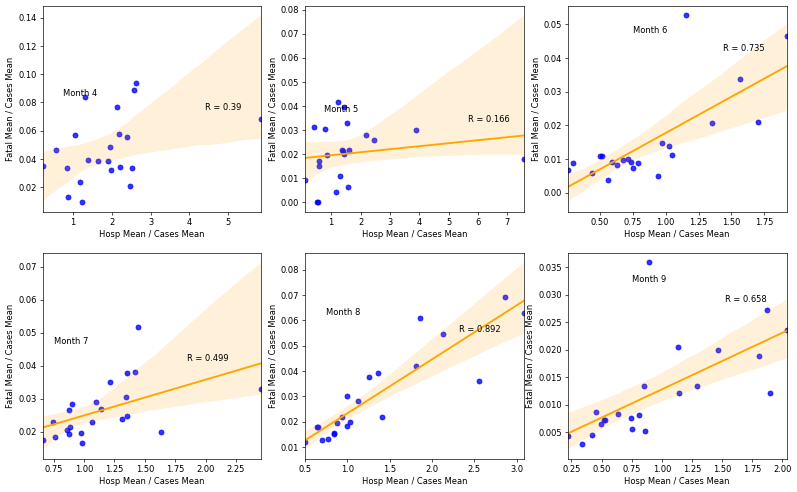

In [79]:
from scipy import stats
import seaborn as sns
fig = plt.figure(figsize=(16,10), dpi=60)

j=0
for i in range(3,160,30):
  j=j+1
  st=i
  se=st+30
  sp=30
  #-------------------
  fatalR=[fatal[region][st+32:se+32].sum(axis=1) for region in TSA1]  # Sum counties to health region
  FS=[]
  for FR in fatalR:
    FS.append(FR.diff().sum())
  FM=np.divide(FS, sp)

  #--------------------
  casesR=[cases[region][st+32:se+32].sum(axis=1) for region in TSA2]  # Sum counties to health region
  CS=[]  
  for CR in casesR:
    CS.append(CR.diff().sum())
  CM=np.divide(CS, sp)

  #-------------------------------------
  HM=[]
  for i in range(len(hosp)):
    temp=hosp.iloc[i,st:se]
    HM.append(temp.sum()/sp)
  HM=np.array(HM)


  #----------------------------
  ICUM=[]
  for i in range(len(icu)):
    temp=icu.iloc[i,st:se]
    ICUM.append(temp.sum()/len(temp))
  ICUM=np.array(ICUM)

  #--------------------
  X = HM/CM
  Y = FM/CM
  ax1 = fig.add_subplot(2,3,j)
  sns.regplot(x=X, y=Y,fit_reg=True,color='blue',line_kws={"color":"orange"})
  ax1.set_xlabel("Hosp Mean / Cases Mean")
  ax1.set_ylabel("Fatal Mean / Cases Mean")
  ax1.text(max(HM/CM)*0.75,max(FM/CM)*0.8,'R = '+str(stats.pearsonr(HM/CM, FM/CM)[0].round(3)))
  ax1.text(max(HM/HM)*0.75,max(FM/CM)*0.9,'Month '+str(j+3))

  #-----------------------------
  print(stats.pearsonr(HM/CM, FM/CM))

plt.savefig('compare_month.png',dpi=300)

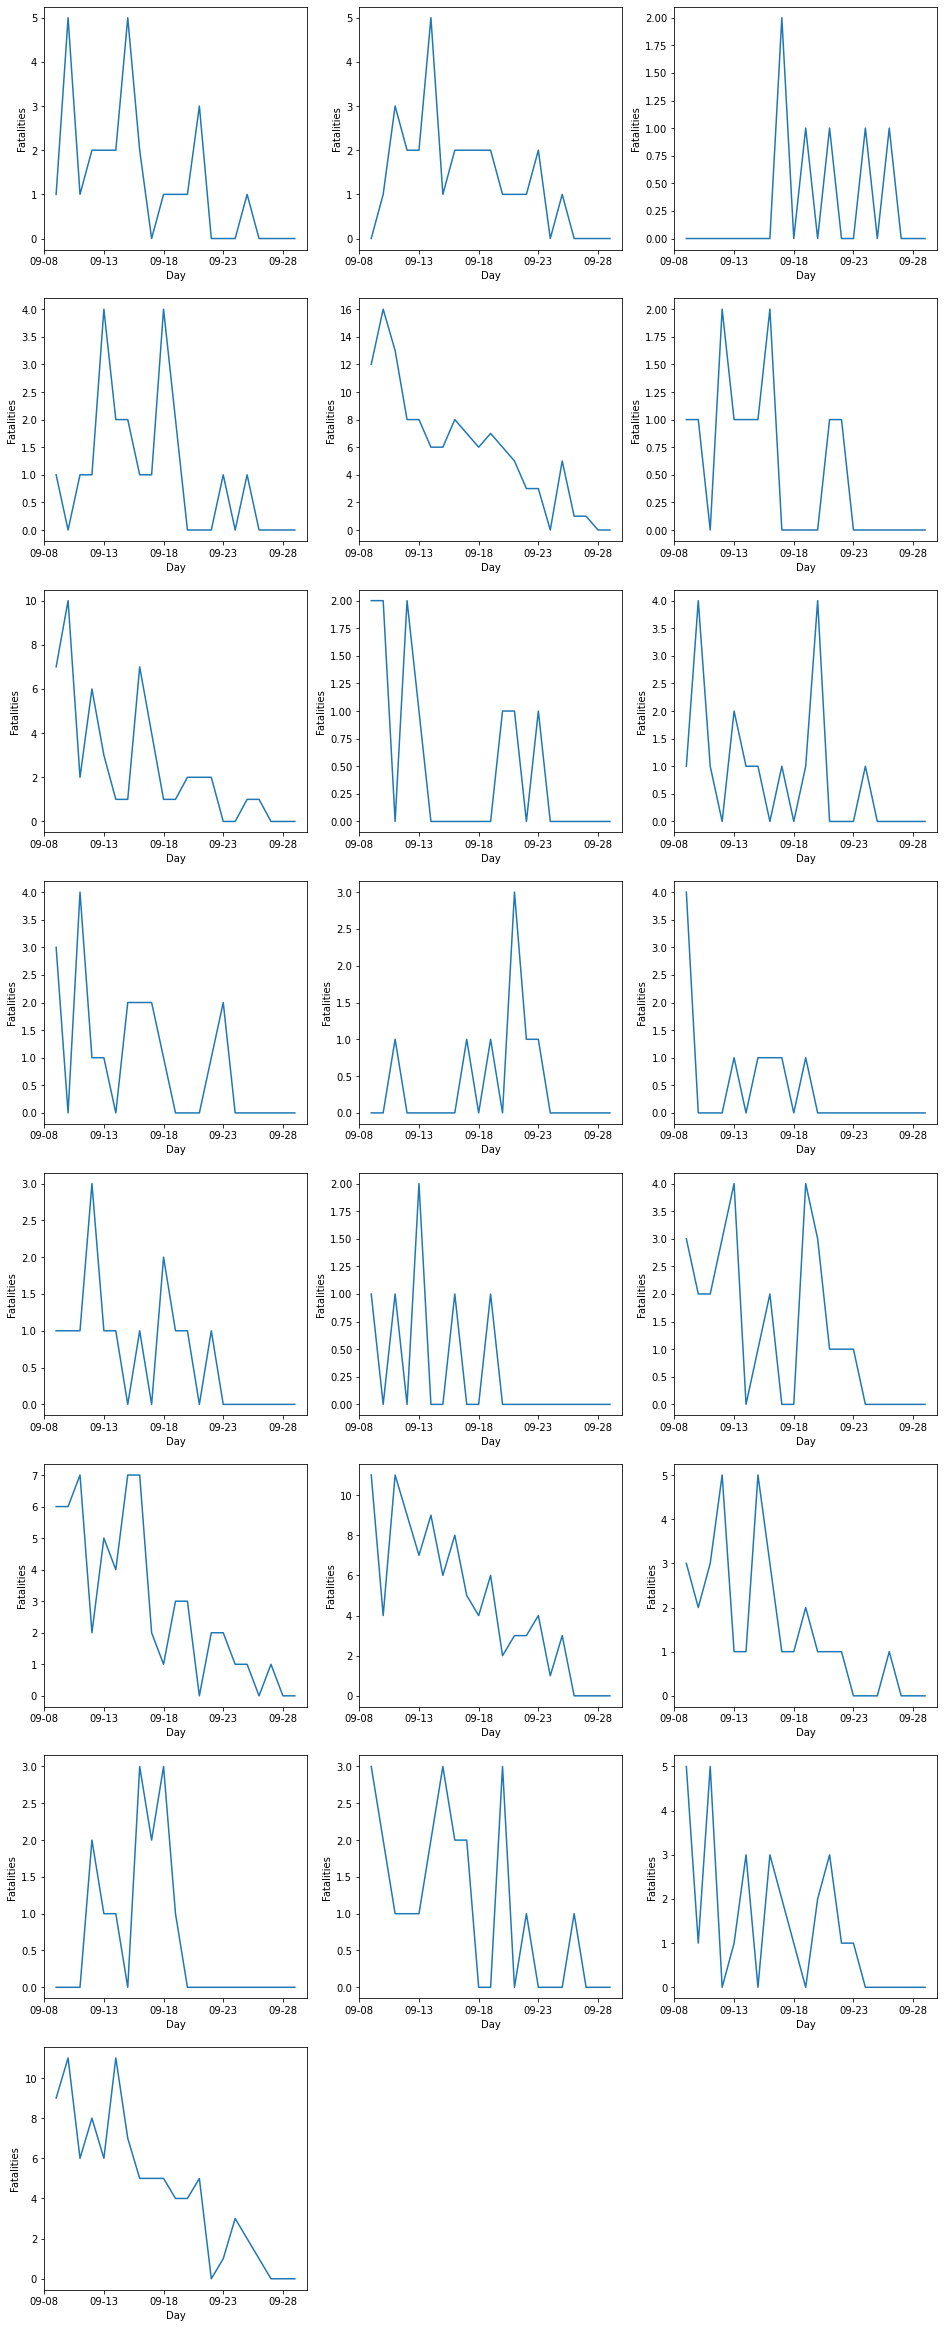

In [80]:
fig = plt.figure(figsize=(16,42))
for pos, item in enumerate(fatalR):
  ax1 = fig.add_subplot(8,3,pos+1)
  ax1.set_xlabel("Day")
  ax1.set_ylabel("Fatalities")
  item.diff().plot()


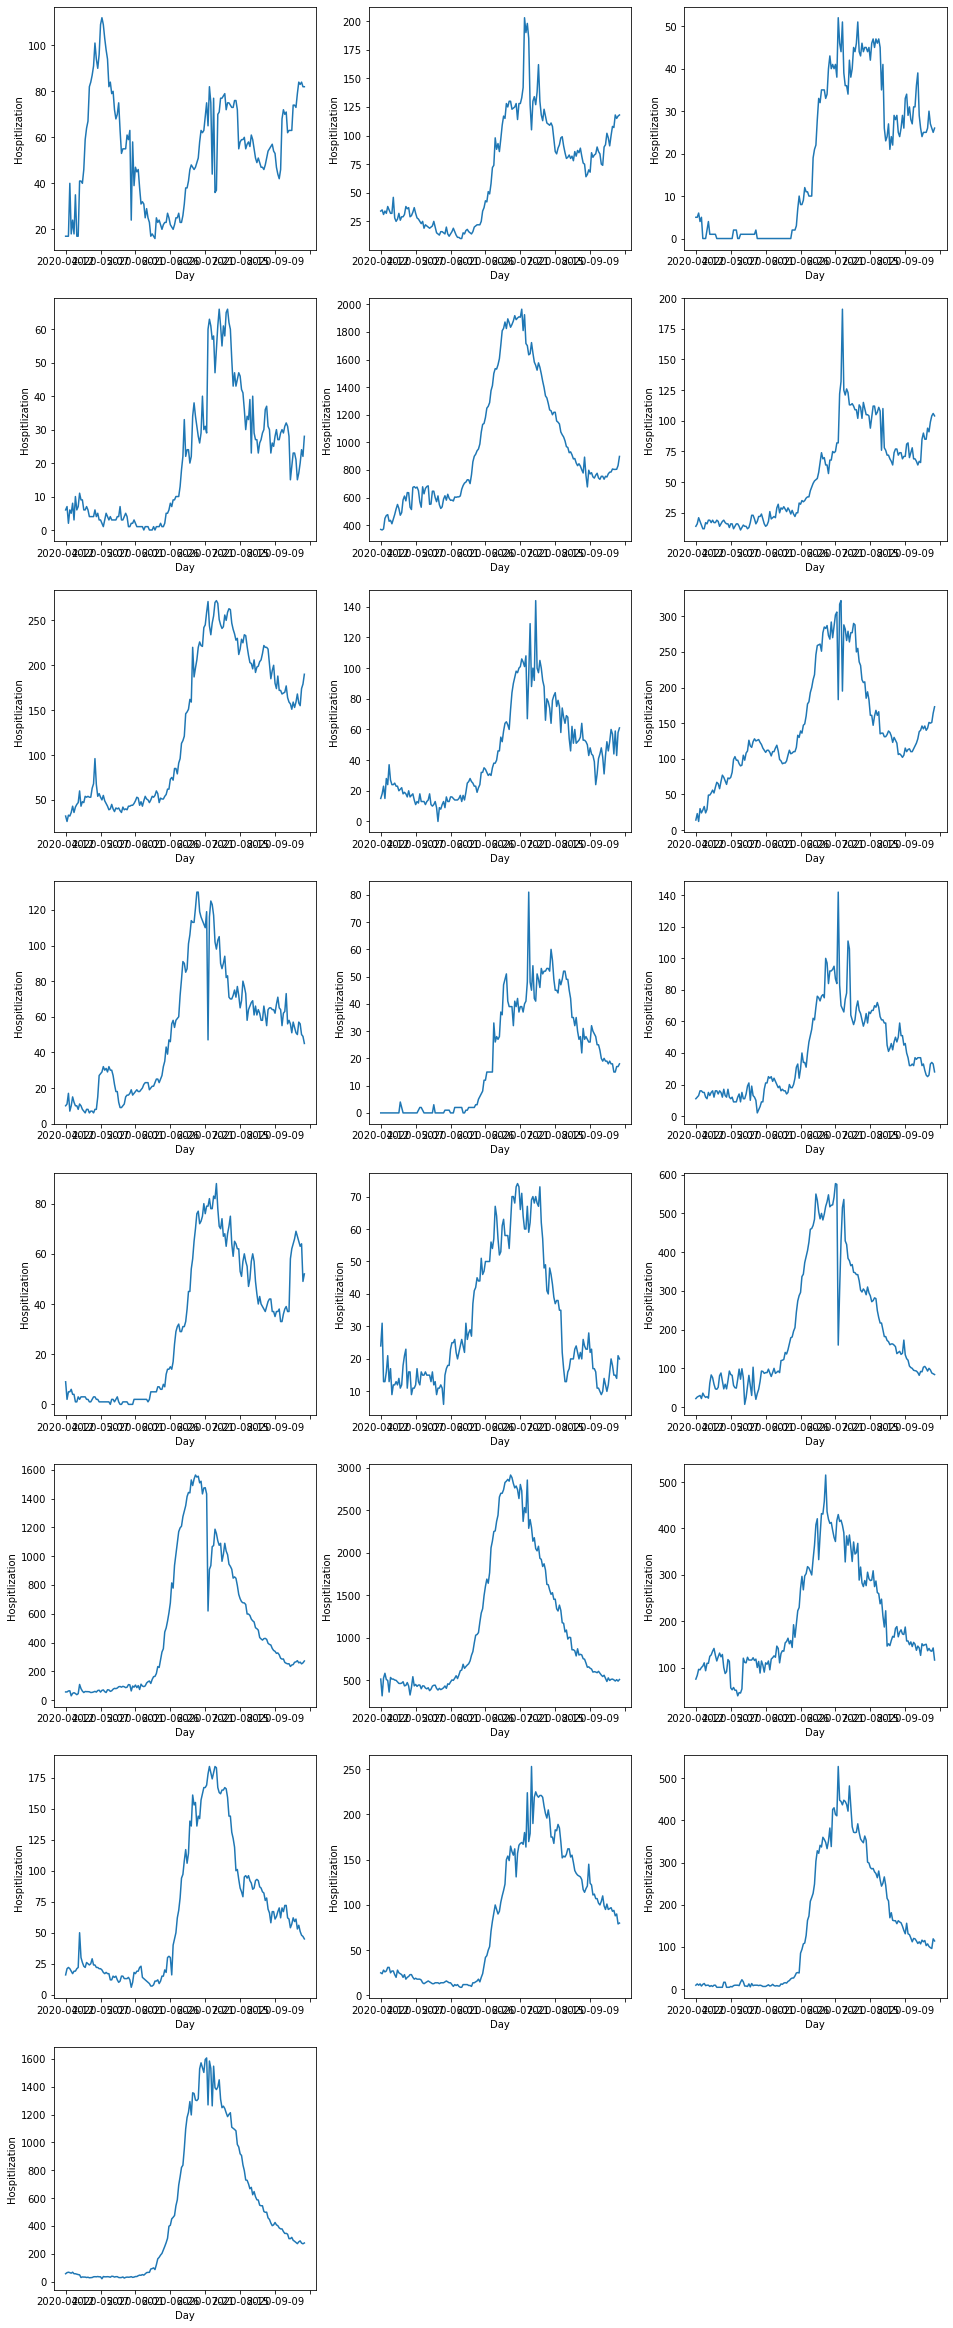

In [81]:
fig = plt.figure(figsize=(16,42))
for i in range(len(hosp)):
  item=hosp.iloc[i,2:]
  ax1 = fig.add_subplot(8,3,i+1)
  ax1.set_xlabel("Day")
  ax1.set_ylabel("Hospitlization")
  item.plot()

In [82]:
casesR[1][85:]

Series([], dtype: float64)

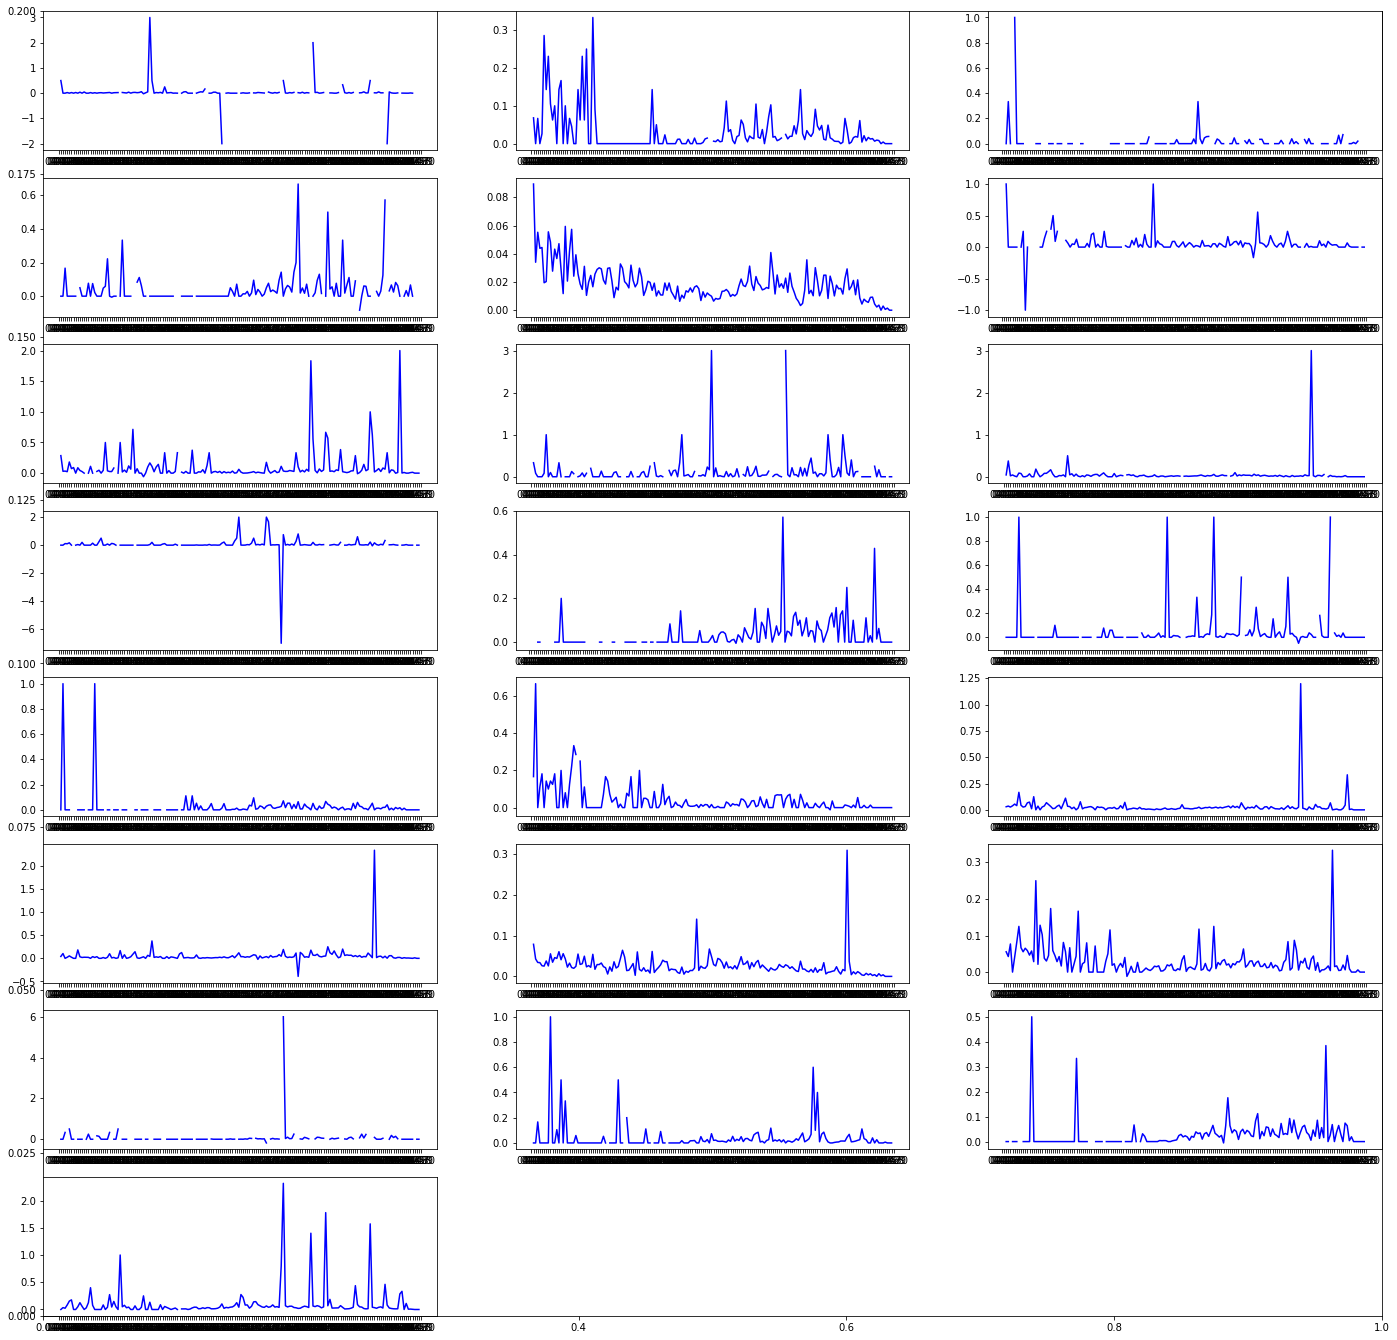

In [48]:
fatalR=[fatal[region][36:].sum(axis=1) for region in TSA1]  # Sum counties to health region
casesR=[cases[region][36:].sum(axis=1) for region in TSA2]  # Sum counties to health region

fig = plt.figure(figsize=(24,24))
plt.ylim(0,0.2)
for i in range(len(fatalR)):
  ax1 = fig.add_subplot(8,3,i+1)
  #ax1.plot(temp1/temp2)
  ax1.plot(fatalR[i].diff()/casesR[i].diff(),color='blue')
plt.savefig('fatal_cases.pdf')

In [49]:
Var1=HM/CM
Var2=FM/CM

In [50]:
# Chi Square testing
tb = pd.crosstab(index=Var1>np.mean(Var1), 
                           columns=Var2>np.mean(Var2))#(np.true_divide(Var2,np.mean(Var2))).astype(int)
print(tb)
from scipy.stats import chi2_contingency
tt=chi2_contingency(tb)
print(tt)

col_0  False  True 
row_0              
False     12      2
True       2      6
(5.698182397959183, 0.01698249073889937, 1, array([[8.90909091, 5.09090909],
       [5.09090909, 2.90909091]]))


In [51]:
#---------------To conduct ANOVA test----------------
from scipy.stats import f_oneway
Var1_t=Var1>np.mean(Var1)
#gp=Var1.groupby('Rt3M_int')

f_oneway(Var2[Var1_t==0],Var2[Var1_t==1])


F_onewayResult(statistic=8.50580870125448, pvalue=0.008534150786994174)

In [52]:
stats.ttest_ind(Var2[Var1_t==0],Var2[Var1_t==1])

Ttest_indResult(statistic=-2.9164719613352172, pvalue=0.008534150786994142)